# Dataset Information

Steel Plates Faults Data Set
A dataset of steel plates' faults, classified into 7 different types. The goal was to train machine learning for automatic pattern recognition.

The dataset consists of 27 features describing each fault (location, size, ...) and 7 binary features indicating the type of fault (on of 7: Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults). The latter is commonly used as a binary classification target ('common' or 'other' fault.)

- Attribute Information
- V1: X_Minimum
- V2: X_Maximum
- V3: Y_Minimum
- V4: Y_Maximum
- V5: Pixels_Areas
- V6: X_Perimeter
- V7: Y_Perimeter
- V8: Sum_of_Luminosity
- V9: Minimum_of_Luminosity
- V10: Maximum_of_Luminosity
- V11: Length_of_Conveyer
- V12: TypeOfSteel_A300
- V13: TypeOfSteel_A400
- V14: Steel_Plate_Thickness
- V15: Edges_Index
- V16: Empty_Index
- V17: Square_Index
- V18: Outside_X_Index
- V19: Edges_X_Index
- V20: Edges_Y_Index
- V21: Outside_Global_Index
- V22: LogOfAreas
- V23: Log_X_Index
- V24: Log_Y_Index
- V25: Orientation_Index
- V26: Luminosity_Index
- V27: SigmoidOfAreas
- V28: Pastry
- V29: Z_Scratch
- V30: K_Scatch
- V31: Stains
- V32: Dirtiness
- V33: Bumps
- Class: Other_Faults

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [87]:
steel = pd.read_csv('steel_fault.csv')
steel.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,1
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,1


In [88]:
steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1941 non-null   int64  
 1   V2      1941 non-null   int64  
 2   V3      1941 non-null   int64  
 3   V4      1941 non-null   int64  
 4   V5      1941 non-null   int64  
 5   V6      1941 non-null   int64  
 6   V7      1941 non-null   int64  
 7   V8      1941 non-null   int64  
 8   V9      1941 non-null   int64  
 9   V10     1941 non-null   int64  
 10  V11     1941 non-null   int64  
 11  V12     1941 non-null   int64  
 12  V13     1941 non-null   int64  
 13  V14     1941 non-null   int64  
 14  V15     1941 non-null   float64
 15  V16     1941 non-null   float64
 16  V17     1941 non-null   float64
 17  V18     1941 non-null   float64
 18  V19     1941 non-null   float64
 19  V20     1941 non-null   float64
 20  V21     1941 non-null   float64
 21  V22     1941 non-null   float64
 22  

In [89]:
steel.V14.nunique()

24

In [90]:
X = steel.drop('Class', axis=1)
y = steel['Class']

In the original dataset, there are two classes to predict. First let us find out the optimal number of clusters in the model.

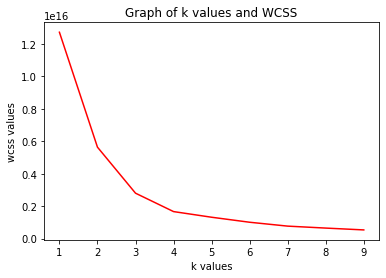

In [91]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

From the above plot we can see either 2 or 3 cluster would be appropriate for the data. Given what we know about the original classes, this seems about appropriate. Let us try clustering using two clusters. This way we can compare the clusters with the original class variable and see if they match up.

In [92]:
cluster = KMeans(n_clusters=2).fit(X)

In [93]:
y_cluster = pd.Series(cluster.labels_)

In [94]:
y_cluster.value_counts()

0    1712
1     229
dtype: int64

In [95]:
y.value_counts()

1    1268
2     673
Name: Class, dtype: int64

In [96]:
# re-labelling the y_cluster data
y_cluster = y_cluster.apply(lambda x: 2 if x==1 else 1)

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_cluster)

0.6053580628541989

In [98]:
#Appending the y_cluster values to the Original Dataframe
steel['y_cluster']=y_cluster

Now let us try a decision tree classifier with the same data

In [99]:
from sklearn.tree import DecisionTreeClassifier
X = steel.drop(['Class','y_cluster'], axis=1)
y = steel['y_cluster']


In [100]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [101]:
model1 = DecisionTreeClassifier()
model1 = model1.fit(X_train, y_train)

In [102]:
ypred = model1.predict(X_test)

In [103]:
accuracy_score(y_test, ypred)

1.0

Accuracy is 100% on this data. The model may be over fitting. Let us try an ensemble bagging classifier.

In [104]:
from sklearn.ensemble import BaggingClassifier

In [105]:
model2 = BaggingClassifier()
model2 = model2.fit(X_train, y_train)

In [106]:
ypred = model2.predict(X_test)

In [107]:
accuracy_score(y_test, ypred)

1.0

Yet again the classification yields very good results.

The dataset has 33 independent features. We could also try dimensionality reduction by applying PCA on the data and trying if our classification yields similar results as before.

In [108]:
# import the necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [109]:
# standardise the data

X_std = StandardScaler().fit_transform(X)

In [110]:
# covariance matrix
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00051546  0.98882298  0.04184286 ...  0.07377766  0.10397756
   0.22140961]
 [ 0.98882298  1.00051546  0.05217423 ...  0.06150319  0.09657306
   0.20180749]
 [ 0.04184286  0.05217423  1.00051546 ... -0.06663543  0.06429539
   0.1261862 ]
 ...
 [ 0.07377766  0.06150319 -0.06663543 ...  1.00051546 -0.03353481
  -0.10036427]
 [ 0.10397756  0.09657306  0.06429539 ... -0.03353481  1.00051546
  -0.08732287]
 [ 0.22140961  0.20180749  0.1261862  ... -0.10036427 -0.08732287
   1.00051546]]


In [111]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [112]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-1.77993455e-01 -5.18645321e-02 -1.63806322e-02 ...  7.18342483e-01
  -1.73355972e-04  8.91111629e-11]
 [-1.43921410e-01 -3.61416428e-02 -3.24718456e-02 ... -6.86343395e-01
   1.65580597e-04 -8.51142563e-11]
 [ 9.06483684e-03  2.99543585e-02 -2.40027964e-01 ... -2.30144070e-04
  -7.07104504e-01  3.63881754e-07]
 ...
 [-5.78497663e-02  1.80685469e-01  1.27257853e-01 ...  3.74729269e-04
  -1.29608557e-07  6.65737292e-14]
 [-1.90006058e-02 -7.60783288e-02  1.35920479e-01 ...  2.17466399e-04
  -1.05874692e-07  5.44604434e-14]
 [-1.03940337e-01  1.88717910e-02 -2.08660327e-01 ... -6.72912773e-05
   3.56921505e-07 -1.83806072e-13]]

 Eigen Values 
%s [ 8.99906168e+00  3.73492802e+00  2.87826213e+00  2.37815435e+00
  2.14050979e+00  1.84749992e+00  1.53112470e+00  1.34549367e+00
  1.16774925e+00  9.92945964e-01  9.27079087e-01  7.79609766e-01
  6.97254880e-01  6.35255571e-01  5.59081779e-01  4.89495197e-01
  3.92888932e-01  3.50534629e-01  2.83652522e-01  2.35306650e-01
  

In [113]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 27.25583448  38.56796716  47.28548006  54.4882956   60.97134714
  66.56694742  71.20432883  75.27948179  78.81629278  81.82366975
  84.63155296  86.99278966  89.10459468  91.02861979  92.72193416
  94.20448874  95.39444788  96.45612677  97.31523703  98.02792012
  98.66970193  99.21282739  99.49552639  99.66360564  99.81139174
  99.93967363  99.97442962  99.99472916  99.99847805  99.99996268
 100.         100.         100.        ]


In [114]:
len(cum_var_exp[cum_var_exp > 99])

12

Thus we can see that 99% of the variance is explained by the first 22 principal components

In [115]:
pca1 = PCA(n_components=22).fit_transform(X)

Now let us try the decision tree classifier again

In [116]:
model_pca = DecisionTreeClassifier()
model_pca = model_pca.fit(pca1, y)

In [117]:
y_pred = model_pca.predict(pca1)

In [118]:
accuracy_score(y, y_pred)

1.0

As we can see above, the accuracy remains unchanged inspite of reduced number of features.

### DT After Applying MCA

In [119]:
pip install prince

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [122]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33'],
      dtype='object')

In [123]:
## Distinguish between categorical and numeric column names

cat = []
num = []
for i in X.columns:
    if X[i].nunique() < X.shape[0]/4:
        cat.append(i)
    else:
        num.append(i)

In [124]:
## Distinguish between categorical and numeric columns of train & test data

X_train_cat = X_train[cat]
X_train_num = X_train[num]
X_test_cat = X_test[cat]
X_test_num = X_test[num]

In [125]:
## Apply MCA

import prince
from sklearn.metrics import make_scorer
mca = prince.MCA()

mca_X_train = mca.fit_transform(X_train_cat)
mca_X_test = mca.fit_transform(X_test_cat)

In [126]:
main_mca_X_train = pd.concat([mca_X_train,X_train_num],axis = 1)
main_mca_X_test = pd.concat([mca_X_test,X_test_num],axis = 1)

In [127]:
from sklearn.metrics import make_scorer
from sklearn.metrics import explained_variance_score

explained_var = make_scorer(explained_variance_score)
explained_var

make_scorer(explained_variance_score)

In [128]:
from sklearn import tree
model2=tree.DecisionTreeClassifier()
model2.fit(main_mca_X_train,y_train)

DecisionTreeClassifier()

In [129]:
y_pred_DT_2 = model2.predict(main_mca_X_test)

In [130]:
from sklearn.metrics import confusion_matrix
cm_mCA= confusion_matrix(y_test, y_pred_DT_2)

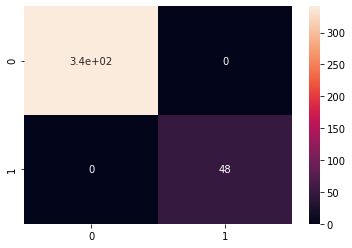

In [131]:
sns.heatmap(cm_mCA, annot=True)
plt.show()

In [133]:
ac_mCA = accuracy_score(y_test, y_pred_DT_2)
print("Accuracy Score:", ac_mCA)

Accuracy Score: 1.0


In [135]:
from sklearn.metrics import classification_report

classification_2=classification_report(y_test,y_pred_DT_2)
print(classification_2)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       341
           2       1.00      1.00      1.00        48

    accuracy                           1.00       389
   macro avg       1.00      1.00      1.00       389
weighted avg       1.00      1.00      1.00       389

